# CROSSVALIDATION-REPORTS

In [1]:
import seaborn
from seaborn_qqplot import pplot
seaborn.set(font_scale = 2)
import matplotlib.pyplot as plt
from lib.auxiliary_functions import *

import warnings
warnings.filterwarnings('ignore')

# PARSERS

### UNIT PARSING

Specify unit parsing if any must be applied

In [2]:
def parse_units(df, col, unit):
    if unit == 'cm s-1':
        df[col] = df[col]*0.01
    return df

### FEATURE-TYPE PARSING

Specify the feature type parsings that must be applied

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [4]:
def serie_name(s,f,v):
    i_name = os.path.basename(s['instrument'])
    p_name = os.path.basename(s['platform'])
    dm = os.path.basename(f['data_mode'])
    pl = os.path.basename(f['processing_level'])
    return '%s (%s) | %s'%(i_name, ','.join([pl,dm]), v['param_name'])

In [5]:
def parse_series(s,f,v,qc_max,center):
    ftype = f['feature_type']
    name = serie_name(s,f,v)
    try:
        if ftype == 'timeSeries':
            y = v['data']
        if ftype == 'grid':
            lat1,lon1 = center.split(',')
            index1 = find_nearest(f['coordinates']['latitude']['data'], float(lat1))
            index2 = find_nearest(f['coordinates']['longitude']['data'], float(lon1))
            y = [t[index1][index2] for t in v['data']]
        if ftype in ['timeSeriesProfile']:
            y = [t[0] for t in v['data']]
        try:
            x = f['coordinates']['time']['data']
            data = {'time': x, name: y}
        except:
            #print('New feature type ('+ftype+'). Please set in the parse series function the logic to compose y.')
            pass
    except Exception as e:
        pass
        data = None
    return data

## SEARCH CONSTRAINS

Specify the period (start date, end date), variable (standard_name), resolution, area (center and radious) and qc_max to consider (remember 0 is not used at SOCIB) for the analysis.

In [6]:
period = ['2016-06-01','2016-06-30']
standard_name = 'sea_water_speed'
resolution = '1h'
center = '38.7977,0.7848'
radious = '3'
qc_max = '2'

## SERACH RESULTS

In [7]:
sources = sources_lookup(period, standard_name, center, radious)

matches:2


### TIMESERIES

In [8]:
df_series = sources_timeseries(sources, standard_name, resolution, center, qc_max, period, parse_units, parse_series)
df_series

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
time,,,
2016-06-01T00:00:00,0.12819,0.5143,0.0338
2016-06-01T01:00:00,0.08616,0.3277,0.0422
2016-06-01T02:00:00,0.07102,0.4273,0.0217
2016-06-01T03:00:00,0.07535,0.4865,0.0398
2016-06-01T04:00:00,0.05967,0.3636,0.0200
...,...,...,...
2016-06-29T20:00:00,0.06147,0.3520,0.0361
2016-06-29T21:00:00,0.05730,0.4447,0.0280
2016-06-29T22:00:00,0.06841,0.2641,0.0551


### MIN,MAX,MEAN & PERCENTILES

In [9]:
df_series_desc = df_series.describe(percentiles=[.25, .5, .75, .98, .999])
df_series_desc

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
count,666.000000,693.000000,693.000000
mean,0.162138,0.256947,0.101253
std,0.094922,0.090354,0.077142
min,0.001540,0.095000,0.001800
25%,0.089213,0.194400,0.047500
50%,0.149145,0.236200,0.082900
75%,0.214452,0.306000,0.131200
98%,0.420887,0.493472,0.342656
99.9%,0.535371,0.574526,0.456510
max,0.541050,0.582000,0.460800


### QUALITY FLAGS PERCENTAGE

In [10]:
df_series_qc = qcpercentage(sources, standard_name, resolution, center, qc_max, period, parse_units, parse_series)
df_series_qc

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"%QC=1,2",100.0,100.0,100.0


### PEARSON CORRELATION

In [11]:
df_series_corr = df_series.corr()
df_series_corr

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"SCB-CODARSSPROC001 (L1,rt) | WSPE",1.000000,-0.282128,0.678978
"SCB-DCS002 (L1,rt) | CUR_SPE_DEV",-0.282128,1.000000,-0.368722
"SCB-DCS002 (L1,rt) | CUR_SPE",0.678978,-0.368722,1.000000


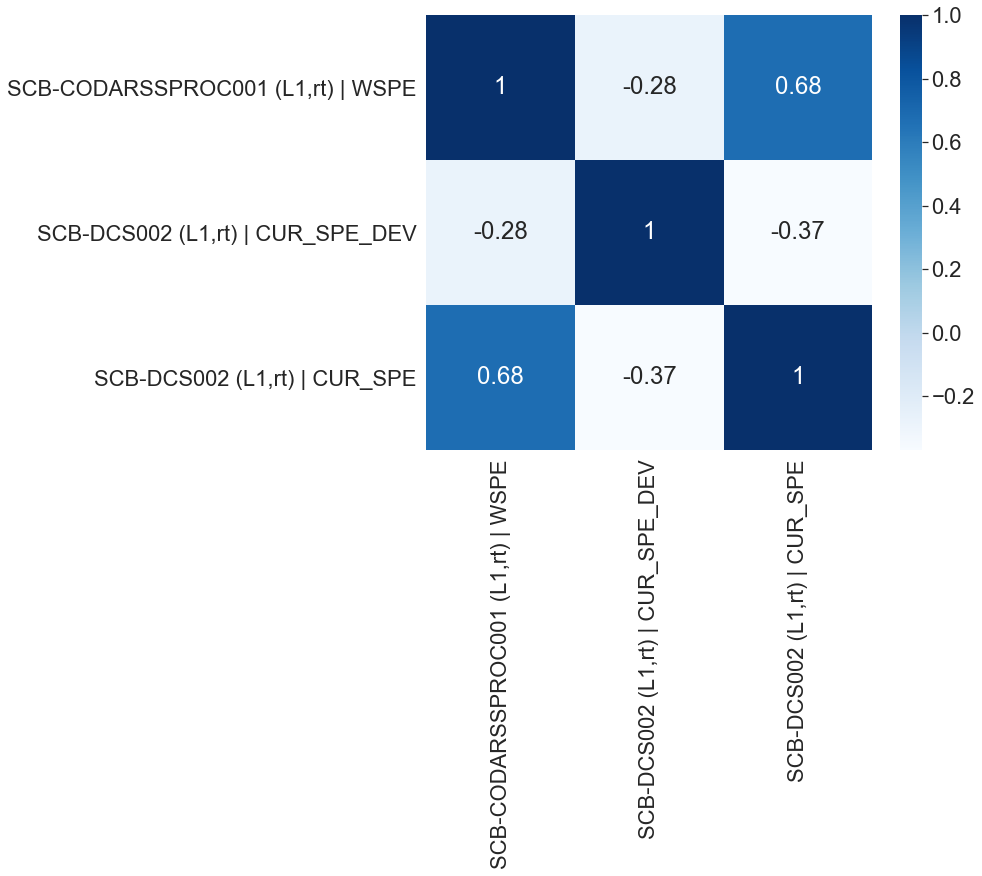

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax = seaborn.heatmap(df_series_corr, cmap="Blues", annot=True);

### MEAN ABSOLUTE ERROR

In [13]:
df_series_mae = mae(df_series)
df_series_mae

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"SCB-CODARSSPROC001 (L1,rt) | WSPE",0.000000,0.141850,0.075685
"SCB-DCS002 (L1,rt) | CUR_SPE_DEV",0.141850,0.000000,0.173762
"SCB-DCS002 (L1,rt) | CUR_SPE",0.075685,0.173762,0.000000


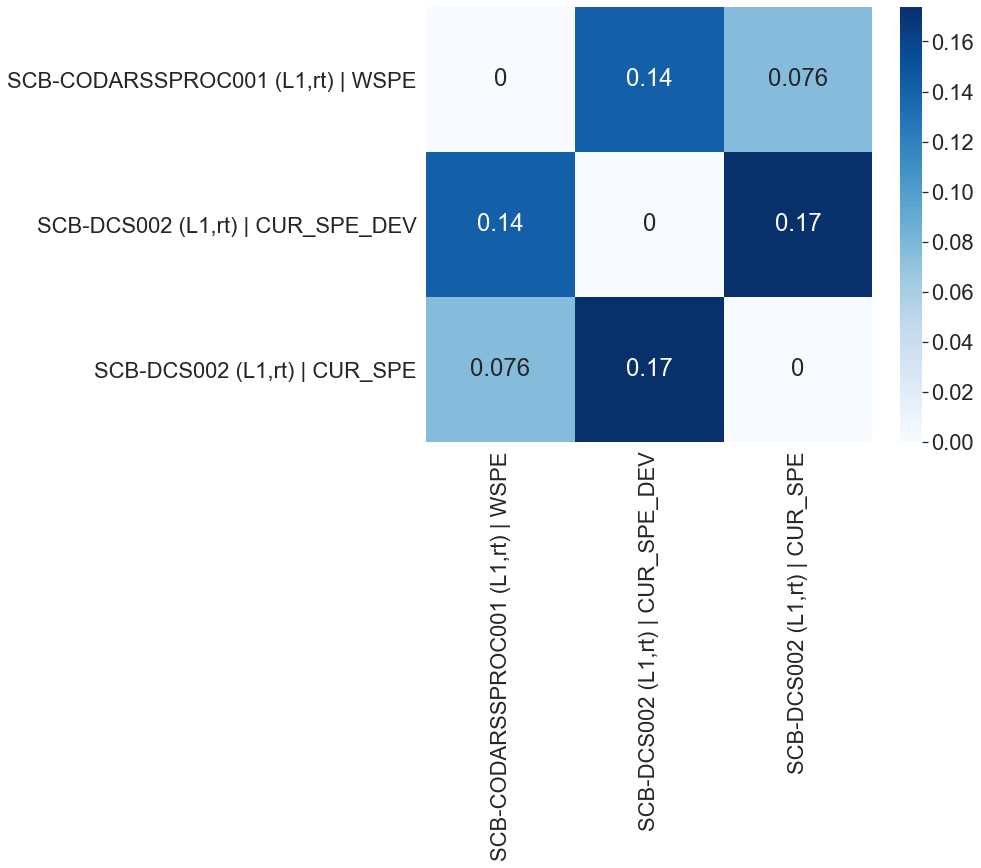

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax = seaborn.heatmap(df_series_mae, cmap="Blues", annot=True);

### ROOT MEAN SQUARE ERROR

In [15]:
df_series_mse = mse(df_series)
df_series_mse

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"SCB-CODARSSPROC001 (L1,rt) | WSPE",0.000000,0.031662,0.008862
"SCB-DCS002 (L1,rt) | CUR_SPE_DEV",0.031662,0.000000,0.043468
"SCB-DCS002 (L1,rt) | CUR_SPE",0.008862,0.043468,0.000000


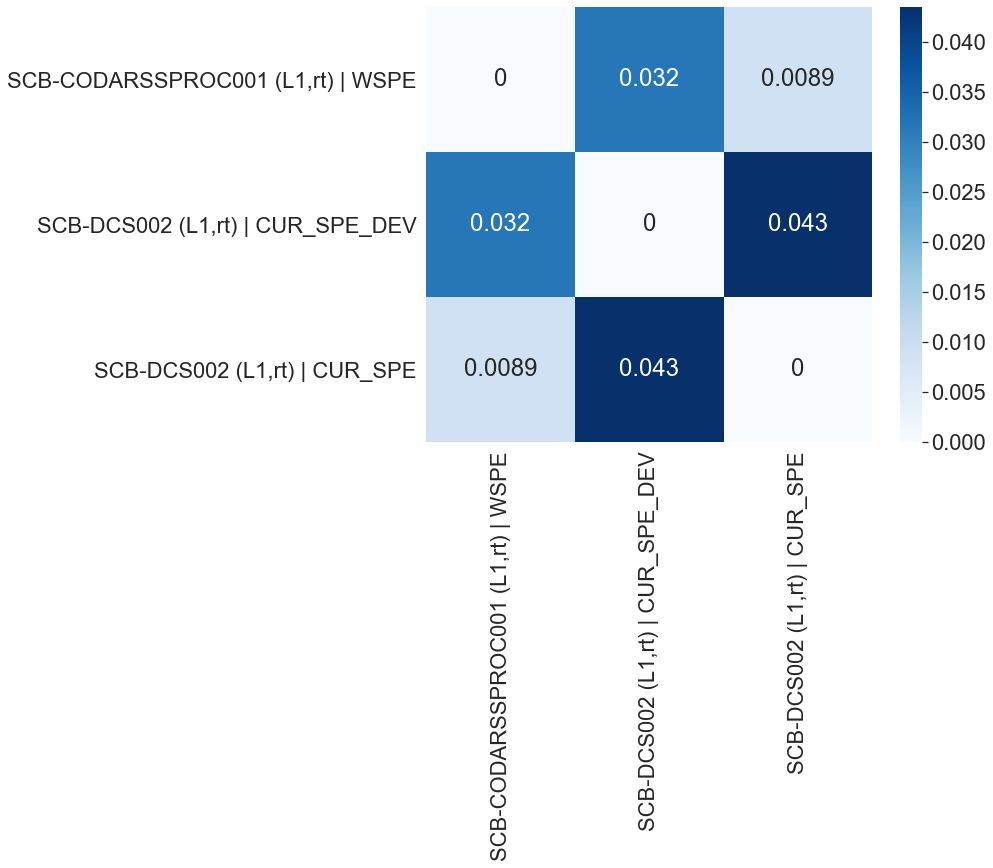

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
ax = seaborn.heatmap(df_series_mse, cmap="Blues", annot=True);

## PLOTS

In [17]:
pivot = 'SCB-CODARSSPROC001 (L1,rt) | WSPE'

### REGRESSION

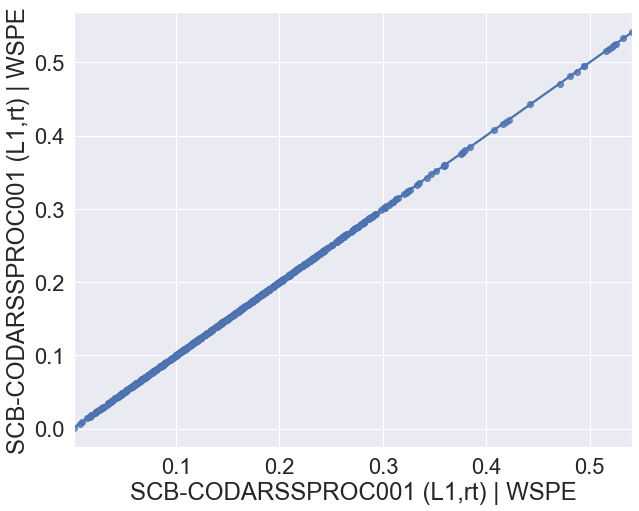

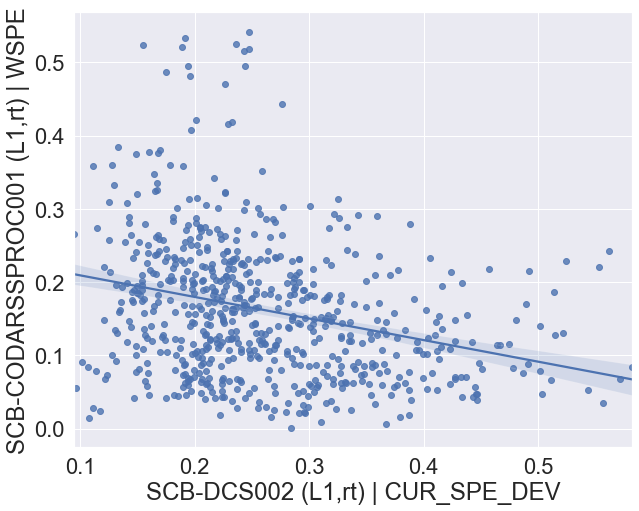

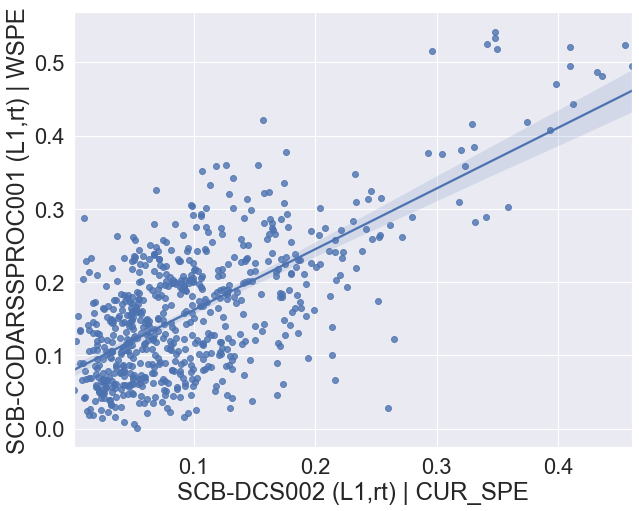

In [18]:
cols = list(df_series.columns)
for j in cols:
    fig, ax = plt.subplots(figsize=(10,8))
    seaborn.regplot(y=pivot, x=j,data=df_series, ax = ax)

### QUANTILE-QUANTILE

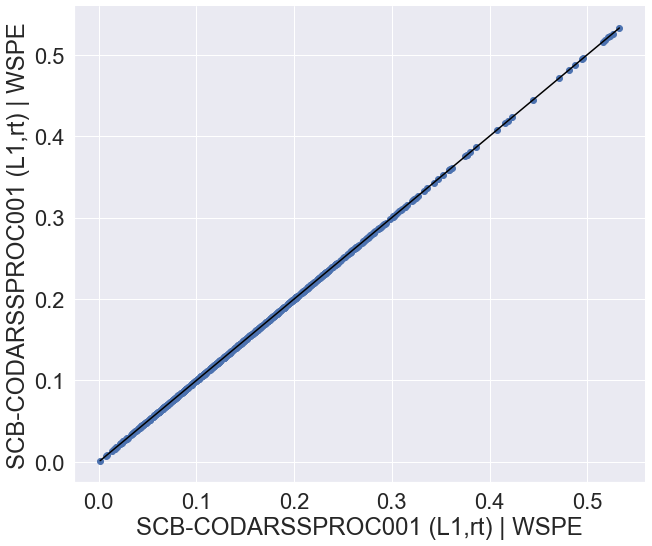

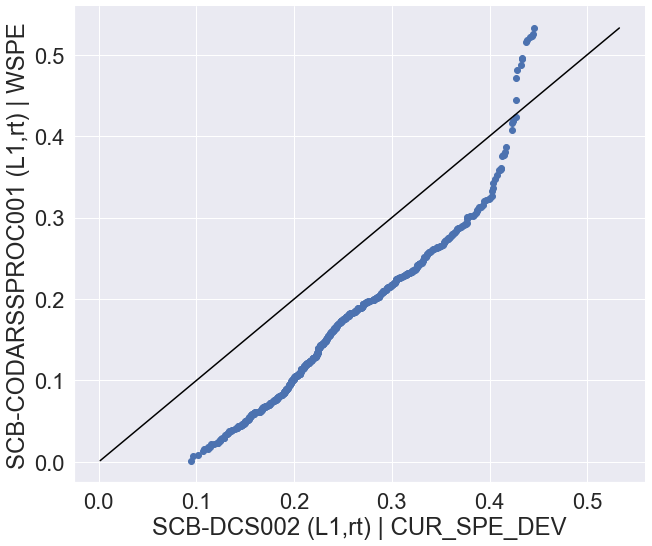

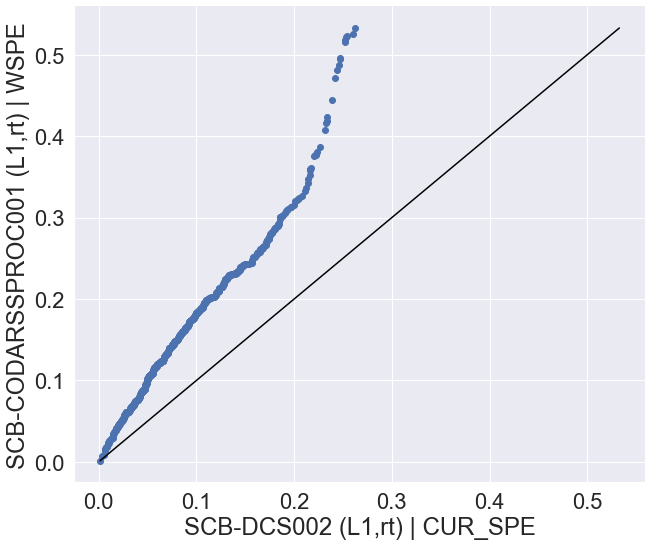

In [19]:
cols = list(df_series.columns)
for j in cols:
    pplot(y=pivot, x=j,data=df_series, kind='qq', height=8, aspect=1.2, 
          display_kws={"identity":True})

## SUMMARY

In [20]:
name = '%s_%s-%s.xlsx'%(standard_name, period[0].replace('-',''),period[1].replace('-',''))
name

'sea_water_speed_20160601-20160630.xlsx'

In [21]:
writer = pd.ExcelWriter(name, engine='xlsxwriter')
df_series.to_excel(writer, sheet_name='series')
df_series_desc.to_excel(writer, sheet_name='description')
df_series_qc.to_excel(writer, sheet_name='qualityflags')
df_series_corr.to_excel(writer, sheet_name='correlation')
df_series_mae.to_excel(writer, sheet_name='meanabsoluteerror')
df_series_mse.to_excel(writer, sheet_name='meansquareerror')
writer.save()